<img src="http://cfs22.simplicdn.net/ice9/new_logo.svgz "/>

# California Housing Price Prediction

**DESCRIPTION**

**Background of Problem Statement :**

The US Census Bureau has published California Census Data which has 10 types of metrics such as the population, median income, median housing price, and so on for each block group in California. The dataset also serves as an input for project scoping and tries to specify the functional and nonfunctional requirements for it.

**Problem Objective :**

The project aims at building a model of housing prices to predict median house values in California using the provided dataset. This model should learn from the data and be able to predict the median housing price in any district, given all the other metrics.
Districts or block groups are the smallest geographical units for which the US Census Bureau
publishes sample data (a block group typically has a population of 600 to 3,000 people). There are 20,640 districts in the project dataset.

**Domain:  Finance and Housing**


**Analysis Tasks to be performed:**

1. Build a model of housing prices to predict median house values in California using the provided dataset.

2. Train the model to learn from the data to predict the median housing price in any district, given all the other metrics.

3. Predict housing prices based on median_income and plot the regression chart for it.





* * *

#### 1. Load the data :

#### Read the “housing.csv” file from the folder into the program.

In [1]:
#Import the required libraries
import pandas as pd
df_cal=pd.read_csv(r'./california_housing.csv')
print(df_cal.shape)
df_cal.columns

(20640, 10)


Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

#### Print first few rows of this data.

In [2]:
df_cal.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


#### Extract input (X) and output (Y) data from the dataset.

In [3]:
df_cal_X=df_cal.copy()
df_cal_X=df_cal_X.drop(['median_house_value'],axis='columns')
df_cal_X.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

In [4]:
df_cal_Y = pd.DataFrame(df_cal['median_house_value'])
df_cal_Y.columns

Index(['median_house_value'], dtype='object')

#### 2. Handle missing values

#### Check which columns has missing values

In [5]:
print('Check if dataframe has any missing values: ')
print(df_cal_X.isna().any().any())
df_cal_X.loc[:, df_cal_X.isnull().any()].columns

Check if dataframe has any missing values: 
True


Index(['total_bedrooms'], dtype='object')

In [6]:
df_cal_X.describe(include='all')  
# The following output showing presence of missing values in 
# total_bedrooms attribute(20433 rowcount compared to 20640 in all other attributes)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9136
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,NaN
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,NaN
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,NaN
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,NaN
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,NaN
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,NaN


#### Fill the missing values with the mean of the respective column.

In [7]:
df_cal_X['total_bedrooms'].fillna(df_cal_X['total_bedrooms'].mean(), inplace=True)
df_cal_X.describe(include='all') 
# The following output shows missing values in total_bedrooms attributes 
# are repalced  now (20640 rowcount which is equal to 20640 in all other attributes)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9136
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,NaN
std,2.003532,2.135952,12.585558,2181.615252,419.266592,1132.462122,382.329753,1.899822,NaN
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,NaN
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,NaN
50%,-118.490000,34.260000,29.000000,2127.000000,438.000000,1166.000000,409.000000,3.534800,NaN
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,NaN


#### Giving missing value replacment for all other attributes so that in future if there is additional data rows/samples with missing values in other attributes then that is handled 

In [8]:
df_cal_X['longitude'].fillna(df_cal_X['longitude'].mean(), inplace=True)
df_cal_X['latitude'].fillna(df_cal_X['latitude'].mean(), inplace=True)
df_cal_X['housing_median_age'].fillna(df_cal_X['housing_median_age'].mean(), inplace=True)
df_cal_X['total_rooms'].fillna(df_cal_X['total_rooms'].mean(), inplace=True)
df_cal_X['population'].fillna(df_cal_X['population'].mean(), inplace=True)
df_cal_X['households'].fillna(df_cal_X['households'].mean(), inplace=True)
df_cal_X['median_income'].fillna(df_cal_X['median_income'].mean(), inplace=True)

# for categorical column ocean_proximity doing it using mode() , 
# here <1H OCEAN has occured 9136 times,so replacing missing values with <1H OCEAN
df_cal_X['ocean_proximity'].fillna(df_cal_X['ocean_proximity'].mode()[0], inplace=True)

df_cal_X.describe(include='all')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9136
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,NaN
std,2.003532,2.135952,12.585558,2181.615252,419.266592,1132.462122,382.329753,1.899822,NaN
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,NaN
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,NaN
50%,-118.490000,34.260000,29.000000,2127.000000,438.000000,1166.000000,409.000000,3.534800,NaN
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,NaN


#### Missing value Replacemnt for Y

In [9]:
df_cal_Y['median_house_value'].fillna(df_cal_Y['median_house_value'].mean(), inplace=True)

#### 3. Encode categorical data :

#### Find the catgorical column

In [10]:
df_cal_X.dtypes

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms        float64
population              int64
households              int64
median_income         float64
ocean_proximity        object
dtype: object

In [11]:
from sklearn.compose import make_column_selector as selector
categorical_columns_selector=selector(dtype_include=object)
categorical_columns=categorical_columns_selector(df_cal_X)
categorical_columns

['ocean_proximity']

#### Convert categorical column in the dataset to numerical data.


In [12]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

encoder=OneHotEncoder(sparse=False)
encoded_ndarray_X=encoder.fit_transform(df_cal_X.ocean_proximity.values.reshape(-1,1)) 
encoded_df_X=pd.DataFrame(encoded_ndarray_X,columns=["ocean_proximity"+
                str(encoder.categories_[0][i]) for i in range(len(encoder.categories_[0]))]) 
encoded_df_X

,ocean_proximity<1H OCEAN,ocean_proximityINLAND,ocean_proximityISLAND,ocean_proximityNEAR BAY,ocean_proximityNEAR OCEAN
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...
20635,0.0,1.0,0.0,0.0,0.0
20636,0.0,1.0,0.0,0.0,0.0
20637,0.0,1.0,0.0,0.0,0.0
20638,0.0,1.0,0.0,0.0,0.0


#### Merge the encoded columns in the dataset and generate a category column encoded dataframe

In [13]:
df_cal_encoded_X=df_cal_X.drop(['ocean_proximity'],axis='columns')
df_cal_encoded_X=pd.concat([df_cal_encoded_X,encoded_df_X],axis=1)
df_cal_encoded_X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity<1H OCEAN,ocean_proximityINLAND,ocean_proximityISLAND,ocean_proximityNEAR BAY,ocean_proximityNEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,0.0,1.0,0.0,0.0,0.0
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,0.0,1.0,0.0,0.0,0.0
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,0.0,1.0,0.0,0.0,0.0
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,0.0,1.0,0.0,0.0,0.0


#### Check the dataframe statistics

In [14]:
df_cal_encoded_X.describe(include='all')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity<1H OCEAN,ocean_proximityINLAND,ocean_proximityISLAND,ocean_proximityNEAR BAY,ocean_proximityNEAR OCEAN
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,0.442636,0.317393,0.000242,0.110950,0.128779
std,2.003532,2.135952,12.585558,2181.615252,419.266592,1132.462122,382.329753,1.899822,0.496710,0.465473,0.015563,0.314077,0.334963
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-118.490000,34.260000,29.000000,2127.000000,438.000000,1166.000000,409.000000,3.534800,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,1.000000,1.000000,0.000000,0.000000,0.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,1.000000,1.000000,1.000000,1.000000,1.000000


#### 4. Split the dataset

#### Split the data into 80% training dataset and 20% test dataset.

In [15]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_cal_encoded_X, df_cal_Y, random_state=1, train_size=0.8, test_size=0.2)
print("x_train {}, x_test {}, y_train {}, y_test{}".format(x_train.shape, x_test.shape, y_train.shape, y_test.shape))

x_train (16512, 13), x_test (4128, 13), y_train (16512, 1), y_test(4128, 1)


In [16]:
## Concat x_test, y_test and x_train,y_train so that the index can be reset with proper training, testing x and y
x_train_y_train=pd.concat([x_train,y_train],axis=1)
x_test_y_test=pd.concat([x_test,y_test],axis=1)

# Reseting the index of the train and test data so that after standardization when the 
# ndarray is reset for sclaed x, the corresponding y can be mapped
x_train_y_train.reset_index(inplace=True,drop=True)
print(x_train_y_train.index)
x_test_y_test.reset_index(inplace=True,drop=True)
print(x_test_y_test.index)

RangeIndex(start=0, stop=16512, step=1)
RangeIndex(start=0, stop=4128, step=1)


In [17]:
## separate x_train,y_train,x_test,y_test from the index reset concatenated x and y data

x_train=x_train_y_train.copy()
x_train=x_train.drop(['median_house_value'],axis='columns')
print(x_train.columns)
y_train = pd.DataFrame(x_train_y_train['median_house_value'])
print(y_train.columns)


x_test=x_test_y_test.copy()
x_test=x_test.drop(['median_house_value'],axis='columns')
print(x_test.columns)
y_test = pd.DataFrame(x_test_y_test['median_house_value'])
print(y_test.columns)

print("x_train {}, x_test {}, y_train {}, y_test{}".format(x_train.shape, x_test.shape, y_train.shape, y_test.shape))

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity<1H OCEAN', 'ocean_proximityINLAND',
       'ocean_proximityISLAND', 'ocean_proximityNEAR BAY',
       'ocean_proximityNEAR OCEAN'],
      dtype='object')
Index(['median_house_value'], dtype='object')
Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity<1H OCEAN', 'ocean_proximityINLAND',
       'ocean_proximityISLAND', 'ocean_proximityNEAR BAY',
       'ocean_proximityNEAR OCEAN'],
      dtype='object')
Index(['median_house_value'], dtype='object')
x_train (16512, 13), x_test (4128, 13), y_train (16512, 1), y_test(4128, 1)


#### 5. Standardize data

#### Standardize training and test datasets.

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

scaler=StandardScaler()
#scaler=MinMaxScaler()
#scaler=RobustScaler()
encoding_column_names = ['ocean_proximity<1H OCEAN','ocean_proximityINLAND','ocean_proximityISLAND', 'ocean_proximityNEAR BAY','ocean_proximityNEAR OCEAN']
scaling_column_feature_names = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms','population', 'households', 'median_income']


#### scale training X using Standard Scaler

In [19]:
scaled_ndarray_x_train=scaler.fit_transform(x_train[scaling_column_feature_names])
scaled_df_x_train=pd.DataFrame(scaled_ndarray_x_train,columns=scaling_column_feature_names)
scaled_df_x_train=pd.concat([scaled_df_x_train,x_train[encoding_column_names]],axis=1)
scaled_df_x_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity<1H OCEAN,ocean_proximityINLAND,ocean_proximityISLAND,ocean_proximityNEAR BAY,ocean_proximityNEAR OCEAN
0,-1.422509,0.972290,1.858903,-0.564977,-0.604200,-0.486114,-0.571594,-0.362326,0.0,0.0,0.0,1.0,0.0
1,-1.382659,1.084596,1.064348,-0.530516,-0.594649,-0.404243,-0.516682,-0.141023,0.0,0.0,0.0,1.0,0.0
2,-0.829737,1.061199,-1.001494,-1.189875,-1.263228,-1.250537,-1.293298,-0.661450,0.0,1.0,0.0,0.0,0.0
3,0.609852,-0.754411,0.428704,1.184737,2.476042,1.880128,2.276001,-1.248647,1.0,0.0,0.0,0.0,0.0
4,0.589927,-0.815243,0.746526,-0.362345,-0.494362,-0.600911,-0.487918,1.828920,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,0.843972,-0.876076,-0.922039,-0.400482,-0.155296,-0.308134,-0.168904,-1.106963,1.0,0.0,0.0,0.0,0.0
16508,-0.027752,-0.567235,1.064348,-0.401860,-0.659119,-0.598241,-0.629121,2.476651,1.0,0.0,0.0,0.0,0.0
16509,0.654684,-0.796526,1.064348,-0.554409,-0.582710,-0.578663,-0.542830,-1.450442,1.0,0.0,0.0,0.0,0.0
16510,1.202624,-0.890114,-1.478227,-0.118818,-0.203052,-0.090999,-0.061694,-0.657643,0.0,1.0,0.0,0.0,0.0


#### scale test X using Standard Scaler

In [20]:
scaled_ndarray_x_test=scaler.fit_transform(x_test[scaling_column_feature_names])
scaled_df_x_test=pd.DataFrame(scaled_ndarray_x_test,columns=scaling_column_feature_names)
scaled_df_x_test=pd.concat([scaled_df_x_test,x_test[encoding_column_names]],axis=1)
scaled_df_x_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity<1H OCEAN,ocean_proximityINLAND,ocean_proximityISLAND,ocean_proximityNEAR BAY,ocean_proximityNEAR OCEAN
0,0.599533,-0.736853,0.812266,0.086072,0.324898,-0.272027,0.336970,-0.309873,1.0,0.0,0.0,0.0,0.0
1,-0.115054,0.539300,0.653317,-0.197735,-0.185728,-0.242883,-0.150118,-0.967961,0.0,1.0,0.0,0.0,0.0
2,-1.443583,0.985014,1.368589,-0.363933,-0.290228,0.092270,-0.233919,0.085103,0.0,0.0,0.0,1.0,0.0
3,-1.373130,1.022548,1.845437,-1.035534,-1.035980,-1.051193,-1.069301,-1.204782,0.0,0.0,0.0,1.0,0.0
4,0.715276,-0.849454,0.653317,-0.495165,-0.577604,-0.613180,-0.556025,0.688695,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4123,-0.074796,0.558066,-0.300379,-0.109642,0.016147,0.047697,-0.029656,-0.792571,0.0,1.0,0.0,0.0,0.0
4124,0.559275,-0.746236,1.607013,-1.175395,-1.249731,-1.210627,-1.278802,-0.859746,1.0,0.0,0.0,0.0,0.0
4125,-1.418421,0.924022,-0.220904,-1.183114,-1.259231,-1.213198,-1.289277,0.620640,0.0,0.0,0.0,0.0,1.0
4126,0.730373,-0.722777,1.050690,-0.526952,-0.579979,-0.512034,-0.582213,0.531108,1.0,0.0,0.0,0.0,0.0


#### 6. Perform Linear Regression
#### ** Perform Polynomial Regression
#### ** Perform Regression using KNeighboursRegressor 



#### Perform Linear Regression on training data.

In [21]:
from sklearn.linear_model import LinearRegression

# Model initialization
linear_regression_model = LinearRegression() 

# Fit the data(train the model)
linear_regression_model.fit(scaled_df_x_train, y_train)

LinearRegression()

#### Perform Polynomial Regression on training Data

In [22]:
from sklearn.preprocessing import PolynomialFeatures

degree=3
polynomial_features= PolynomialFeatures(degree=degree)
# transform training and test data into polynomial degree, 3 giving best result
x_train_poly = polynomial_features.fit_transform(scaled_df_x_train)
x_test_poly = polynomial_features.fit_transform(scaled_df_x_test)

polynomial_regression_model = LinearRegression()
polynomial_regression_model.fit(x_train_poly, y_train)

LinearRegression()

#### Perform KNeighborsRegressor om training data

In [23]:
from sklearn.neighbors import KNeighborsRegressor

# Model initialization
kneighborsregressor_model = KNeighborsRegressor(n_neighbors=11, metric='minkowski', p=1, weights='distance')

# Fit the data(train the model)
kneighborsregressor_model.fit(scaled_df_x_train, y_train)

KNeighborsRegressor(n_neighbors=11, p=1, weights='distance')

#### Predict output for test dataset using the fitted Linear Regression Model.


In [24]:
# Predict
Final_Result_Columns=['Actual House Price','Predicted House Price']

y_predicted_lr = linear_regression_model.predict(scaled_df_x_test)
y_predicted_lr_df=pd.DataFrame(y_predicted_lr,columns=['Predicted Value'])
y_predicted_lr_df=y_predicted_lr_df.astype(int)
lr_y_predicted_with_y_test_df=pd.concat([y_test,y_predicted_lr_df],axis=1)
lr_y_predicted_with_y_test_df.columns=Final_Result_Columns
lr_y_predicted_with_y_test_df

,Actual House Price,Predicted House Price
0,355000,245650
1,70700,96803
2,229400,250506
3,112500,165479
4,225400,285475
...,...,...
4123,68200,90137
4124,225000,178155
4125,350000,284809
4126,227300,266702


#### Predict output for test dataset using the fitted Polynomial Regression Model

In [25]:
# Predict
Final_Result_Columns=['Actual House Price','Predicted House Price']

y_predicted_poly = polynomial_regression_model.predict(x_test_poly)
y_predicted_poly_df=pd.DataFrame(y_predicted_poly,columns=['Predicted Value'])
y_predicted_poly_df=y_predicted_poly_df.astype(int)
pr_y_predicted_with_y_test_df=pd.concat([y_test,y_predicted_poly_df],axis=1)
pr_y_predicted_with_y_test_df.columns=Final_Result_Columns
pr_y_predicted_with_y_test_df

,Actual House Price,Predicted House Price
0,355000,328297
1,70700,69824
2,229400,261821
3,112500,158316
4,225400,300087
...,...,...
4123,68200,71260
4124,225000,178670
4125,350000,304037
4126,227300,246138


#### Predict out for test dataset using fitted KNeighborsRegressor Model

In [26]:
# Predict
Final_Result_Columns=['Actual House Price','Predicted House Price']

y_predicted_knr = kneighborsregressor_model.predict(scaled_df_x_test)
y_predicted_knr_df=pd.DataFrame(y_predicted_knr,columns=['Predicted Value'])
y_predicted_knr_df=y_predicted_knr_df.astype(int)
knr_y_predicted_with_y_test_df=pd.concat([y_test,y_predicted_knr_df],axis=1)
knr_y_predicted_with_y_test_df.columns=Final_Result_Columns
knr_y_predicted_with_y_test_df

,Actual House Price,Predicted House Price
0,355000,340636
1,70700,63981
2,229400,226919
3,112500,174789
4,225400,239152
...,...,...
4123,68200,74059
4124,225000,238946
4125,350000,323291
4126,227300,279340


#### Print root mean squared error (RMSE) from Linear Regression. 


In [27]:
from sklearn.metrics import mean_squared_error, r2_score

# model evaluation
rmse = mean_squared_error(lr_y_predicted_with_y_test_df['Actual House Price'], lr_y_predicted_with_y_test_df['Predicted House Price'],squared=False)
r2 = r2_score(lr_y_predicted_with_y_test_df['Actual House Price'], lr_y_predicted_with_y_test_df['Predicted House Price'])
np.set_printoptions(linewidth=70,edgeitems=12)
# printing values
print('Slope                   :' ,linear_regression_model.coef_)
print('Intercept               :', linear_regression_model.intercept_)
print('Root mean squared error : ', rmse)
print('R2 score                : ', r2)

Slope                   : [[-53274.56856834 -53787.3951718   13459.99994478 -11966.78301079
   32722.17764512 -43216.91502076  27280.31093161  74374.45393177
  -24118.90593665 -63449.58072606 131959.04865968 -26297.78434224
  -18092.77765473]]
Intercept               : [243639.01095296]
Root mean squared error :  68969.66205625009
R2 score                :  0.637352482294028


#### Print root mean squared error (RMSE) from Polynomial Regression

In [28]:
from sklearn.metrics import mean_squared_error, r2_score

# model evaluation
rmse = mean_squared_error(pr_y_predicted_with_y_test_df['Actual House Price'], pr_y_predicted_with_y_test_df['Predicted House Price'],squared=False)
r2 = r2_score(pr_y_predicted_with_y_test_df['Actual House Price'], pr_y_predicted_with_y_test_df['Predicted House Price'])
np.set_printoptions(linewidth=70,edgeitems=12)
# printing values
print('Slope                   :' ,polynomial_regression_model.coef_)
print('Intercept               :', polynomial_regression_model.intercept_)
print('Root mean squared error : ', rmse)
print('R2 score                : ', r2)

Slope                   : [[ 1.86332907e-06  9.29692883e+05 -1.57497293e+05 -2.89717055e+04
   4.27650773e+04 -5.53340211e+04 -3.57945661e+04  1.07452230e+05
   7.05872347e+04 -3.25409681e+05 -3.56594065e+05 -1.52687474e+05
   1.13518669e+06 -3.00495471e+05  6.45750592e+05  5.57336072e+05
  -3.79388250e+04  5.72644826e+04 -7.31099099e+04  1.17695611e+05
  -7.41474256e+04 -5.81559986e+03 -4.72774120e+05 -5.50780618e+05
  -8.89718420e+04  2.48845439e+06 -4.46234932e+05  4.11186893e+05
  -1.47135932e+04  3.60322950e+04 -2.16828495e+03  8.95278183e+04
  -1.55791661e+05 -3.57107996e+04  8.93009864e+04 -2.55795139e+04
   1.61061559e+05 -5.13154827e+05  1.30874502e+05 -1.34621090e+04
  -3.79182309e+04 -2.92887599e+04 -3.28573565e+04  3.08194599e+04
  -1.54793064e+04  1.34736277e+04  1.78765370e+04 -3.31832463e+04
  -3.73928288e+04  1.02542049e+04 -9.94665821e+03  1.20464990e+04
  -3.32077794e+04  3.04255281e+04  4.58863036e+04 -1.09269714e+04
  -2.78043323e+04  2.89705123e+04  5.01676752e+04 

#### Print root mean squared error (RMSE) from KNeighborsRegressor

In [29]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_percentage_error

# model evaluation
rmse = mean_squared_error(knr_y_predicted_with_y_test_df['Actual House Price'], knr_y_predicted_with_y_test_df['Predicted House Price'],squared=False)
r2 = r2_score(knr_y_predicted_with_y_test_df['Actual House Price'], knr_y_predicted_with_y_test_df['Predicted House Price'])
mape=mean_absolute_percentage_error(knr_y_predicted_with_y_test_df['Actual House Price'], knr_y_predicted_with_y_test_df['Predicted House Price'])
np.set_printoptions(linewidth=70,edgeitems=12)
# printing values
print('Root mean squared error : ', rmse)
print('R2 score                : ', r2)
print('MAPE                    : ', mape)

Root mean squared error :  56888.25976287296
R2 score                :  0.7532746290993173
MAPE                    :  0.21812899426106067


#### So Model Evaluation Resultwise R2 score is best for KNeighborsRegressor 
     with 11 neighbors and weightage as distance, R2 for KNeighborsRegressor is: .75

#### Draw the plot for Linear Regression Actual vs Predicted Housing Price

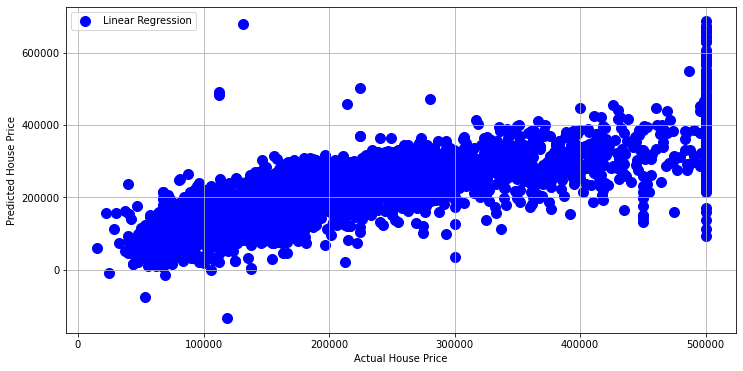

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

# Linear Regression scatter plotting actual vs predicted values
lr_y_predicted_with_y_test_df.sort_values(by=['Actual House Price', 'Predicted House Price'],inplace=True)
plt.figure(figsize=(12, 6))
plt.scatter(lr_y_predicted_with_y_test_df['Actual House Price'], lr_y_predicted_with_y_test_df['Predicted House Price'], s=100,label='Linear Regression',color='b') 
plt.xlabel('Actual House Price')
plt.ylabel('Predicted House Price')
plt.legend()
plt.grid()

#### Draw the plot for Polynomial Regression Actual vs Predicted Housing Price

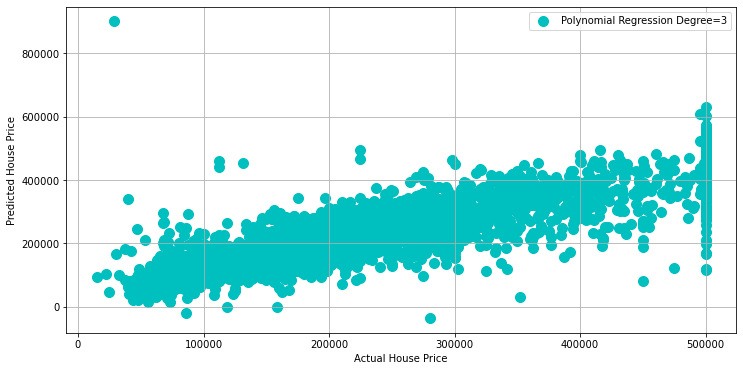

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plynomial Regression scatter plotting actual vs predicted values
pr_y_predicted_with_y_test_df.sort_values(by=['Actual House Price', 'Predicted House Price'],inplace=True)
plt.figure(figsize=(12, 6))
plt.scatter(pr_y_predicted_with_y_test_df['Actual House Price'], pr_y_predicted_with_y_test_df['Predicted House Price'], s=100,label='Polynomial Regression Degree=3',color='c') 
plt.xlabel('Actual House Price')
plt.ylabel('Predicted House Price')
plt.legend()
plt.grid()

#### Draw the plot for KNeighborsRegressor Actual vs Predicted Housing Price

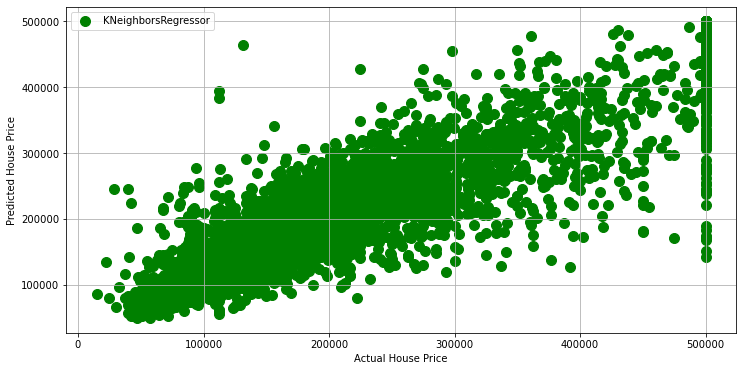

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

# KNeighborsRegressor Regression scatter plotting actual vs predicted values
knr_y_predicted_with_y_test_df.sort_values(by=['Actual House Price', 'Predicted House Price'],inplace=True)
plt.figure(figsize=(12, 6))
plt.scatter(knr_y_predicted_with_y_test_df['Actual House Price'], knr_y_predicted_with_y_test_df['Predicted House Price'], s=100,label='KNeighborsRegressor',color='g') 
plt.xlabel('Actual House Price')
plt.ylabel('Predicted House Price')
plt.legend()
plt.grid()

#### 7. Bonus exercise: Perform Linear Regression with one independent variable :



#### Extract just the median_income column from the independent variables (from X_train and X_test).


### Prediction Without scaling the Median Income Values


In [44]:
x_train, x_test, y_train, y_test = train_test_split(df_cal_encoded_X[['median_income']], df_cal_Y, random_state=1, train_size=0.8, test_size=0.2)
print("x_train {}, x_test {}, y_train {}, y_test{}".format(x_train.shape, x_test.shape, y_train.shape, y_test.shape))

x_train (16512, 1), x_test (4128, 1), y_train (16512, 1), y_test(4128, 1)


In [45]:
x_train.reset_index(inplace=True,drop=True)
x_test.reset_index(inplace=True,drop=True)
y_train.reset_index(inplace=True,drop=True)
y_test.reset_index(inplace=True,drop=True)

#### Linear Regression with only Median Income Feature

Slope                   : [[42055.4573838]]
Intercept               : [44721.83362107]
Root mean squared error :  83228.15155398894
R2 score                :  0.4719087012695562


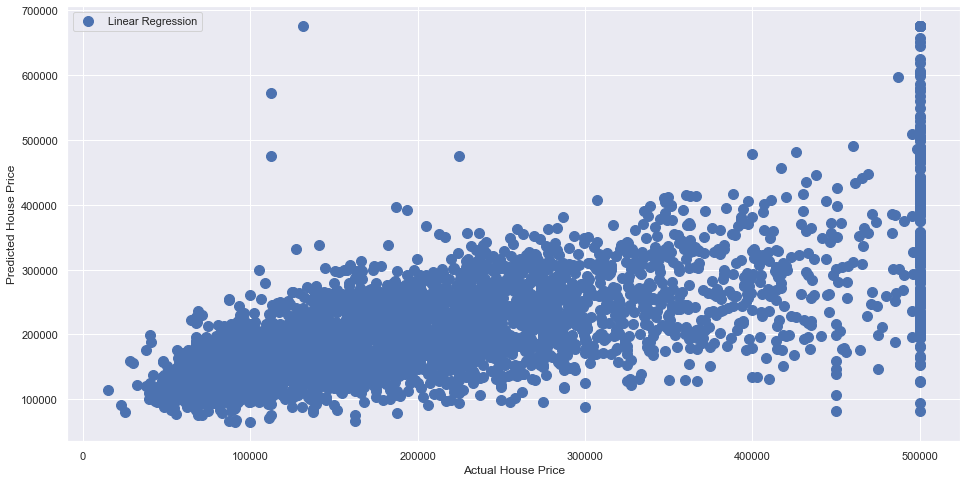

In [96]:
# Model initialization
linear_regression_model = LinearRegression() 

# Fit the data(train the model)
linear_regression_model.fit(x_train, y_train)

# Predict
Final_Result_Columns=['Actual House Price','Predicted House Price']

y_predicted_lr = linear_regression_model.predict(x_test)
y_predicted_lr_df=pd.DataFrame(y_predicted_lr,columns=['Predicted Value'])
y_predicted_lr_df=y_predicted_lr_df.astype(int)
lr_y_predicted_with_y_test_df=pd.concat([y_test,y_predicted_lr_df],axis=1)
lr_y_predicted_with_y_test_df.columns=Final_Result_Columns
lr_y_predicted_with_y_test_df


# model evaluation
rmse = mean_squared_error(lr_y_predicted_with_y_test_df['Actual House Price'], lr_y_predicted_with_y_test_df['Predicted House Price'],squared=False)
r2 = r2_score(lr_y_predicted_with_y_test_df['Actual House Price'], lr_y_predicted_with_y_test_df['Predicted House Price'])
np.set_printoptions(linewidth=70,edgeitems=12)
# printing values
print('Slope                   :' ,linear_regression_model.coef_)
print('Intercept               :', linear_regression_model.intercept_)
print('Root mean squared error : ', rmse)
print('R2 score                : ', r2)


import matplotlib.pyplot as plt
%matplotlib inline

# Linear Regression scatter plotting actual vs predicted values
lr_y_predicted_with_y_test_df.sort_values(by=['Actual House Price', 'Predicted House Price'],inplace=True)
plt.figure(figsize=(16, 8))
plt.scatter(lr_y_predicted_with_y_test_df['Actual House Price'], lr_y_predicted_with_y_test_df['Predicted House Price'], s=100,label='Linear Regression',color='b') 
plt.xlabel('Actual House Price')
plt.ylabel('Predicted House Price')
plt.legend()

<AxesSubplot:xlabel='Actual House Price', ylabel='Predicted House Price'>

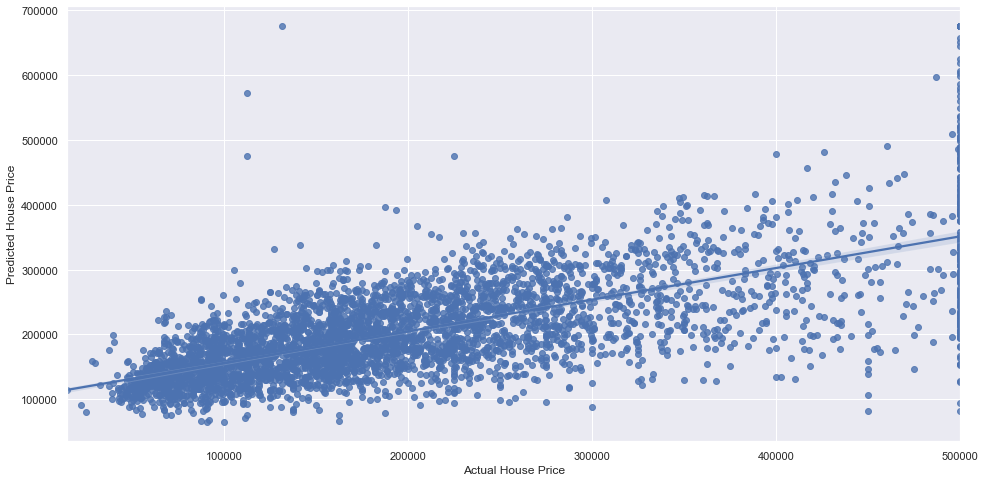

In [94]:
import seaborn as sns

lr_y_predicted_with_y_test_df.reset_index(inplace=True,drop=True)
regression_line_df=x_test.join(lr_y_predicted_with_y_test_df)
regression_line_df.sort_values(by=['median_income','Actual House Price','Predicted House Price'],inplace=True)
sns.set_theme(color_codes=True)
f, ax = plt.subplots(figsize=(16, 8))

# use regplot
sns.regplot(x = "Actual House Price",
            y = "Predicted House Price", 
            data = regression_line_df,
            ax=ax)

In [66]:
print("x_train {}, x_test {}, y_train {}, y_test{}".format(x_train.shape, x_test.shape, y_train.shape, y_test.shape))

x_train (16512, 1), x_test (4128, 1), y_train (16512, 1), y_test(4128, 1)


#### Polynomial Regression with only Median Income Feature

Slope                   : [[ 0.00000000e+00 -4.22496534e+05  2.89109324e+05 -8.96855078e+04
   1.50915980e+04 -1.38547958e+03  6.49032554e+01 -1.21188318e+00]]
Intercept               : [326135.32076626]
Root mean squared error :  81661.67678312596
R2 score                :  0.49160051792969506


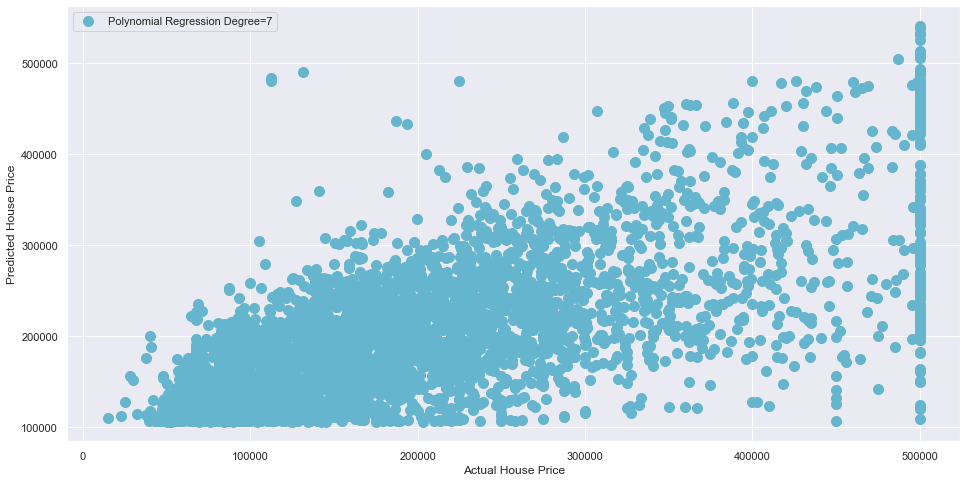

In [97]:
degree=7
polynomial_features= PolynomialFeatures(degree=degree)
# transform training and test data into polynomial degree, 7 giving best result
x_train_poly = polynomial_features.fit_transform(x_train)
x_test_poly = polynomial_features.fit_transform(x_test)

polynomial_regression_model = LinearRegression()
polynomial_regression_model.fit(x_train_poly, y_train)

# Predict
Final_Result_Columns=['Actual House Price','Predicted House Price']

y_predicted_poly = polynomial_regression_model.predict(x_test_poly)
y_predicted_poly_df=pd.DataFrame(y_predicted_poly,columns=['Predicted Value'])
y_predicted_poly_df=y_predicted_poly_df.astype(int)
pr_y_predicted_with_y_test_df=pd.concat([y_test,y_predicted_poly_df],axis=1)
pr_y_predicted_with_y_test_df.columns=Final_Result_Columns

# model evaluation
rmse = mean_squared_error(pr_y_predicted_with_y_test_df['Actual House Price'], pr_y_predicted_with_y_test_df['Predicted House Price'],squared=False)
r2 = r2_score(pr_y_predicted_with_y_test_df['Actual House Price'], pr_y_predicted_with_y_test_df['Predicted House Price'])
np.set_printoptions(linewidth=70,edgeitems=12)
# printing values
print('Slope                   :' ,polynomial_regression_model.coef_)
print('Intercept               :', polynomial_regression_model.intercept_)
print('Root mean squared error : ', rmse)
print('R2 score                : ', r2)


# Plynomial Regression scatter plotting actual vs predicted values
pr_y_predicted_with_y_test_df.sort_values(by=['Actual House Price', 'Predicted House Price'],inplace=True)
plt.figure(figsize=(16, 8))
plt.scatter(pr_y_predicted_with_y_test_df['Actual House Price'], pr_y_predicted_with_y_test_df['Predicted House Price'], s=100,label='Polynomial Regression Degree=7',color='c') 
plt.xlabel('Actual House Price')
plt.ylabel('Predicted House Price')
plt.legend()

<AxesSubplot:xlabel='Actual House Price', ylabel='Predicted House Price'>

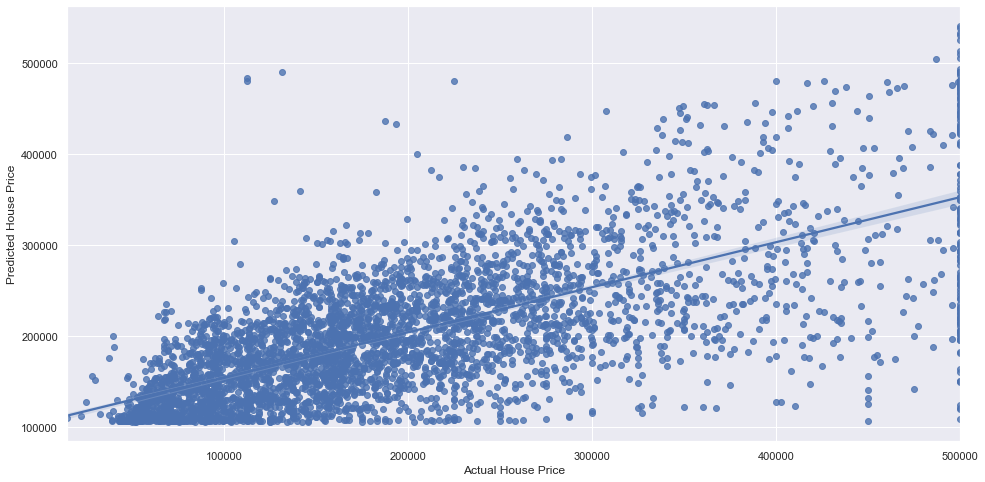

In [98]:
pr_y_predicted_with_y_test_df.reset_index(inplace=True,drop=True)
regression_line_df=x_test.join(pr_y_predicted_with_y_test_df)
regression_line_df.sort_values(by=['median_income','Actual House Price','Predicted House Price'],inplace=True)
sns.set_theme(color_codes=True)
f, ax = plt.subplots(figsize=(16, 8))

# use regplot
sns.regplot(x = "Actual House Price",
            y = "Predicted House Price", 
            data = regression_line_df,
            ax=ax)

#### KNeighborsRegressor Regression with only Median Income Feature

In [99]:
print("x_train {}, x_test {}, y_train {}, y_test{}".format(x_train.shape, x_test.shape, y_train.shape, y_test.shape))

x_train (16512, 1), x_test (4128, 1), y_train (16512, 1), y_test(4128, 1)


Root mean squared error :  81697.24876354146
R2 score                :  0.49115750191500196
MAPE                    :  0.3903577300742382


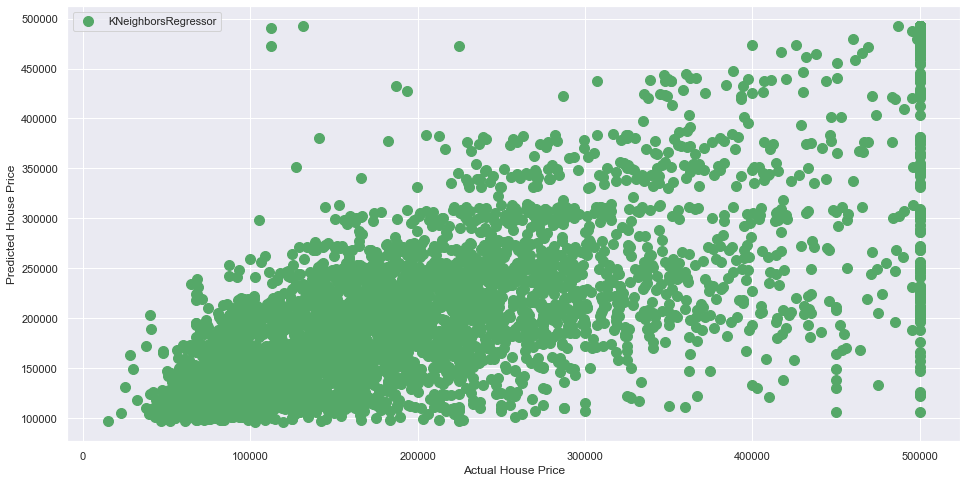

In [156]:
# Model initialization
no_neighbors =100
algo='auto'  # ‘ball_tree’, ‘kd_tree’, ‘brute’
kneighborsregressor_model = KNeighborsRegressor(n_neighbors=no_neighbors, metric='minkowski', p=1, weights='uniform',algorithm=algo)

# KNeighborsRegressor giving better R2 and MAPE with weights=uniform and no of neighbors as 100

# Fit the data(train the model)
kneighborsregressor_model.fit(x_train, y_train)

# Predict
Final_Result_Columns=['Actual House Price','Predicted House Price']

y_predicted_knr = kneighborsregressor_model.predict(x_test)
y_predicted_knr_df=pd.DataFrame(y_predicted_knr,columns=['Predicted Value'])
y_predicted_knr_df=y_predicted_knr_df.astype(int)
knr_y_predicted_with_y_test_df=pd.concat([y_test,y_predicted_knr_df],axis=1)
knr_y_predicted_with_y_test_df.columns=Final_Result_Columns
knr_y_predicted_with_y_test_df

# model evaluation
rmse = mean_squared_error(knr_y_predicted_with_y_test_df['Actual House Price'], knr_y_predicted_with_y_test_df['Predicted House Price'],squared=False)
r2 = r2_score(knr_y_predicted_with_y_test_df['Actual House Price'], knr_y_predicted_with_y_test_df['Predicted House Price'])
mape=mean_absolute_percentage_error(knr_y_predicted_with_y_test_df['Actual House Price'], knr_y_predicted_with_y_test_df['Predicted House Price'])
np.set_printoptions(linewidth=70,edgeitems=12)
# printing values
print('Root mean squared error : ', rmse)
print('R2 score                : ', r2)
print('MAPE                    : ', mape)


# KNeighborsRegressor Regression scatter plotting actual vs predicted values
knr_y_predicted_with_y_test_df.sort_values(by=['Actual House Price', 'Predicted House Price'],inplace=True)
plt.figure(figsize=(16, 8))
plt.scatter(knr_y_predicted_with_y_test_df['Actual House Price'], knr_y_predicted_with_y_test_df['Predicted House Price'], s=100,label='KNeighborsRegressor',color='g') 
plt.xlabel('Actual House Price')
plt.ylabel('Predicted House Price')
plt.legend()

##### KNeighborsRegressor giving better R2 and MAPE with weights=uniform and no of neighbors as 100

<AxesSubplot:xlabel='Actual House Price', ylabel='Predicted House Price'>

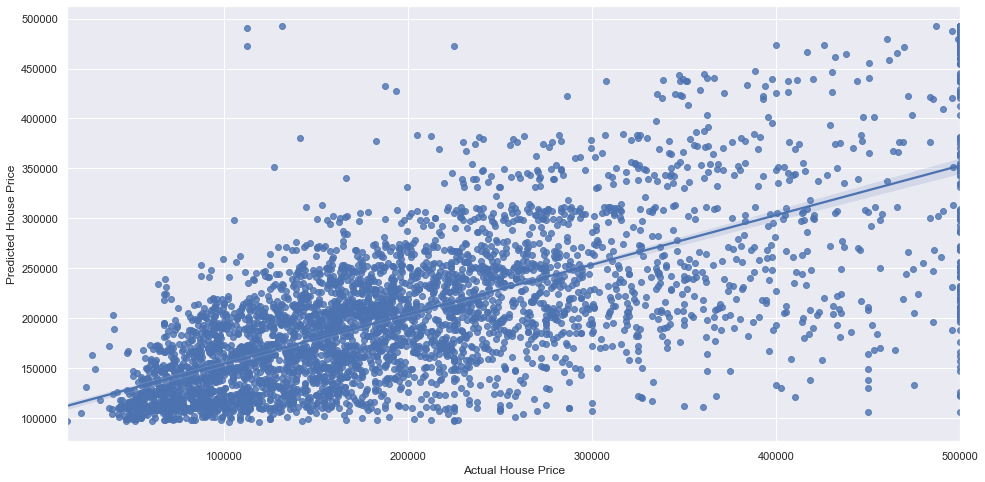

In [152]:
knr_y_predicted_with_y_test_df.reset_index(inplace=True,drop=True)
regression_line_df=x_test.join(knr_y_predicted_with_y_test_df)
regression_line_df.sort_values(by=['median_income','Actual House Price','Predicted House Price'],inplace=True)
sns.set_theme(color_codes=True)
f, ax = plt.subplots(figsize=(16, 8))

# use regplot
sns.regplot(x = "Actual House Price",
            y = "Predicted House Price", 
            data = regression_line_df,
            ax=ax)